In [ ]:

import os
os.getcwd()

'/content/sample_data'

##Data and packages

In [ ]:
# importing packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# if running in Google colab - you should upload the Project2_training.csv to the sample_data folder available when you start the notebook

# change the directory to sample_data
%cd sample_data
%ls 

# reading training file
df = pd.read_csv('Project2_training.csv')

# normalize stock and call prices in relation to the option's strike price
df['Stock Price'] = df['Stock Price']/df['Strike Price']
df['Call Price']  = df['Call Price'] /df['Strike Price']

# split data into training and testing sets
n = 3000
n_train =  (int)(0.8 * n)

# select training set and define independent and dependent variable (call price)
train = df[0:n_train]
X_train = train[['Stock Price', 'Maturity', 'Dividends', 'Volatility', 'Risk-free']].values
y_train = train['Call Price'].values

# select testing set and define independent and dependent variable (call price)
test = df[n_train+1:n]
X_test = test[['Stock Price', 'Maturity', 'Dividends', 'Volatility', 'Risk-free']].values
y_test = test['Call Price'].values

/content/sample_data
anscombe.json*                mnist_test.csv         README.md*
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  Project2_training.csv


In [ ]:
# Plot comparisons
def CheckAccuracy(y, y_hat):
    stats = dict()

    stats['diff'] = y - y_hat

    stats['mse'] = np.mean(stats['diff'] ** 2)
    print("Mean Squared Error:      ", stats['mse'])

    stats['rmse'] = np.sqrt(stats['mse'])
    print("Root Mean Squared Error: ", stats['rmse'])

    stats['mae'] = np.mean(abs(stats['diff']))
    print("Mean Absolute Error:     ", stats['mae'])

    stats['mpe'] = np.sqrt(stats['mse']) / np.mean(y)
    print("Mean Percent Error:      ", stats['mpe'])

    #plots
    #mpl.rcParams['agg.path.chunksize'] = 100000
    plt.figure(figsize=(14, 10))
    plt.scatter(y, y_hat, color='black', linewidth=0.3, alpha=0.4, s=0.5)
    plt.xlabel('Actual Price', fontsize=20, fontname='Times New Roman')
    plt.ylabel('Predicted Price', fontsize=20, fontname='Times New Roman')
    plt.show()

    plt.figure(figsize=(14, 10))
    plt.hist(stats['diff'], bins=50, edgecolor='black', color='white')
    plt.xlabel('Diff')
    plt.ylabel('Density')
    plt.show()

    return# stats

Load Tensor Flow Keras

In [ ]:
# to build the neural we will use Keras due to its friendly API
# https://keras.io/api/
import keras
# importing Keras classes to build the neural networks
from keras.models import Sequential # https://keras.io/api/models/sequential/

# keras provides layers api to construct the neural network
from keras.layers import Dense, Dropout, Activation, LeakyReLU, ReLU #https://keras.io/api/layers/

from keras import backend
def custom_activation(x):
    return backend.exp(x)

### **Part A**

# Part A

>## Part A.1 

Singe Neural Network


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               600       
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 701
Trainable params: 701
Non-trainable params: 0
_________________________________________________________________
None
19/19 [==============================] - 0s 1ms/step
Mean Squared Error:       0.0018805535482700462
Root Mean Squared Error:  0.04336534962697806
Mean Absolute Error:      0.035783279864676124
Mean Percent Error:       0.17927906465655793


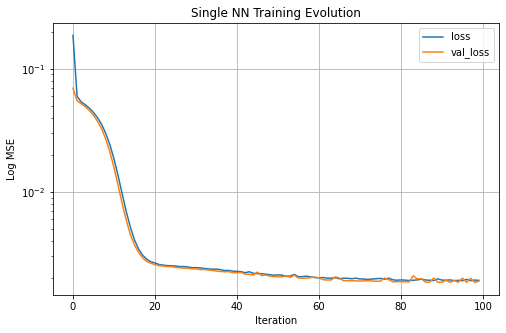

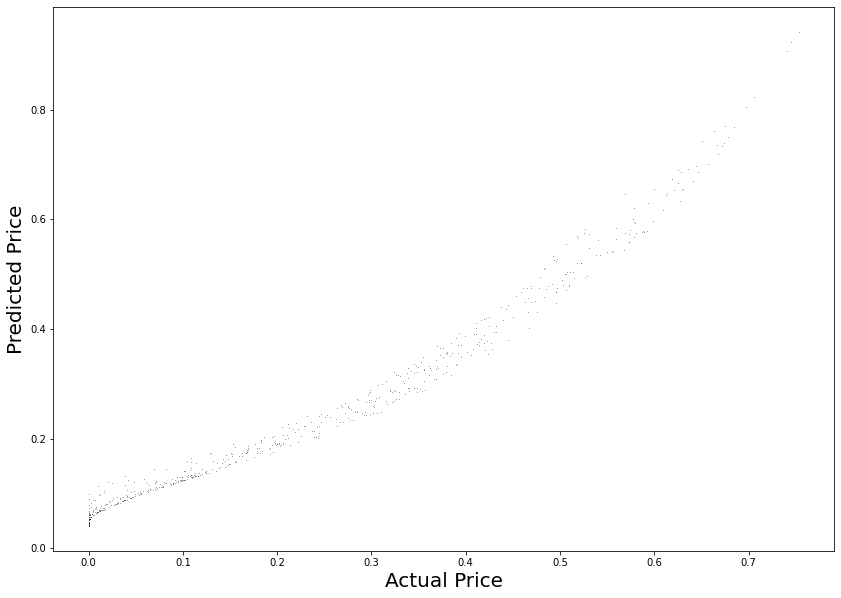

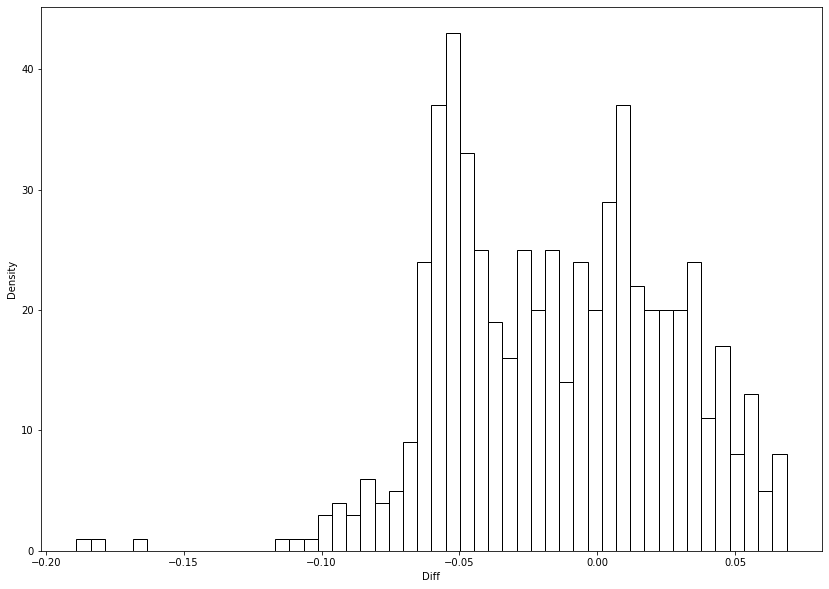

In [ ]:
# SNN 
nodes = 100
# initialize the model as Sequential class - the next steps we will add layers to it 
model11 = Sequential()
# to add a layer we call the add method from model (Sequential) and pass as argument the Dense class
model11.add(Dense(nodes, activation='relu', input_dim=X_train.shape[1])) # activation = 'relu', 'tanh', 'sigmoid'
# since we want to predict a single value we add one additional layer with one neuron 
model11.add(Dense(1))
# we will use our customized activation function
model11.add(Activation(custom_activation))

# compile the model
model11.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'

# fit the model
history11 = model11.fit(X_train, y_train, batch_size=64, epochs=100, validation_split=0.1, verbose=0,
                          validation_data=(X_test, y_test))
print()
# print the model parameters
print(model11.summary())

# plot the model learning history
pd.DataFrame(history11.history).plot(figsize=(8,5), logy=True)
plt.title('Single NN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

y2_test_hat = model11.predict(X_test)
y2_test_hat = np.squeeze(y2_test_hat)
CheckAccuracy(y_test, y2_test_hat)

Deep Neural Network with 3 layers

19/19 [==============================] - 0s 2ms/step
Mean Squared Error:       4.310274197365635e-05
Root Mean Squared Error:  0.006565267852392342
Mean Absolute Error:      0.004555635888734294
Mean Percent Error:       0.027141833051530017


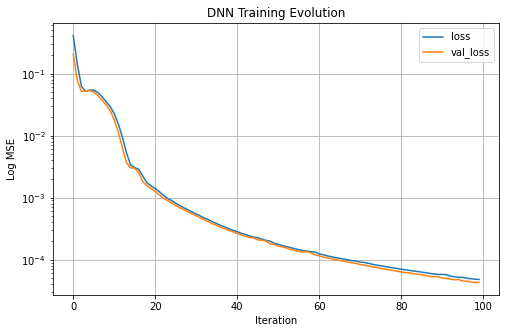

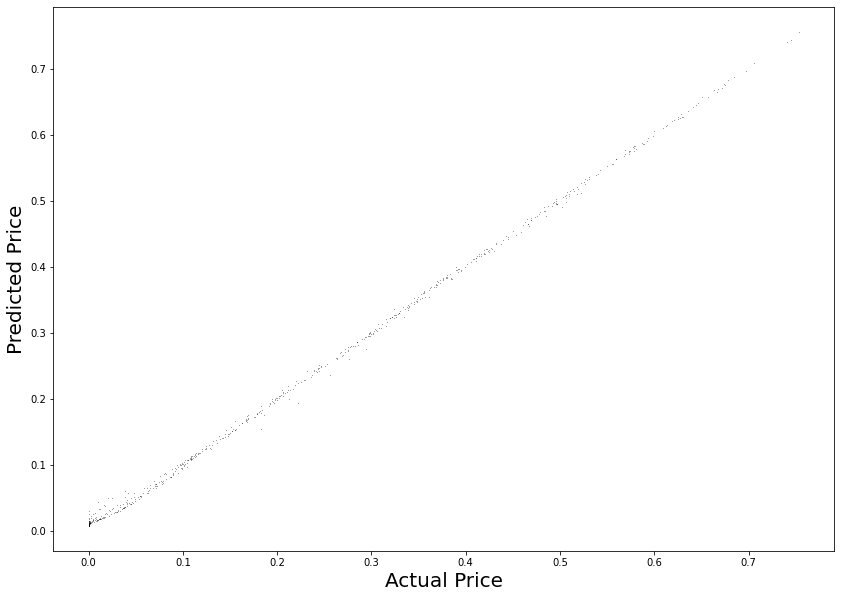

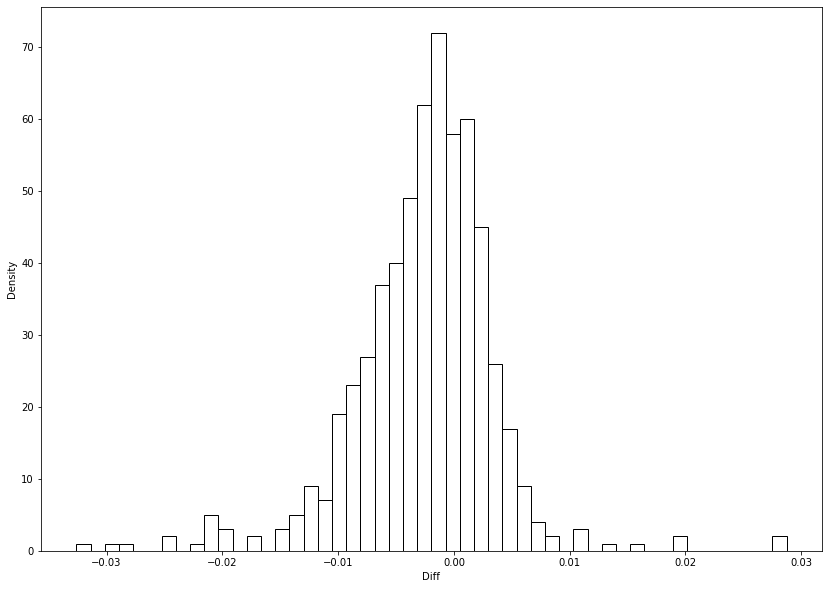

In [ ]:
# number of neurons per layer
nodes2 = 100

# initialize our new model as sequential class
model12 = Sequential()

# add the first layer of 100 neurons - for the first layer you must declare the number of features through input_dim arguments
model12.add(Dense(nodes2, activation='relu', input_dim=X_train.shape[1])) # activation = 'relu', 'tanh', 'sigmoid'

# add second and third layer of 100 neurons - no need to declare the input dimensions, keras does that automatically
for i in range(2):
  model12.add(Dense(nodes2, activation='relu'))

# output layer is the same as the single NN
model12.add(Dense(1))
model12.add(Activation(custom_activation))

# compile and fit the model
model12.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'
history12 = model12.fit(X_train, y_train, batch_size=512, epochs=100, validation_split=0.1, verbose=0,
                          validation_data=(X_test, y_test))
#print()
#print(model2.summary())
pd.DataFrame(history12.history).plot(figsize=(8,5), logy=True)
plt.title('DNN Training Evolution') 
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

y2_test_hat = model12.predict(X_test)
y2_test_hat = np.squeeze(y2_test_hat)
CheckAccuracy(y_test, y2_test_hat)

Deep neural network with 10 layers

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               600       
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 100)               10100     
                                                                 
 dense_12 (Dense)            (None, 100)              

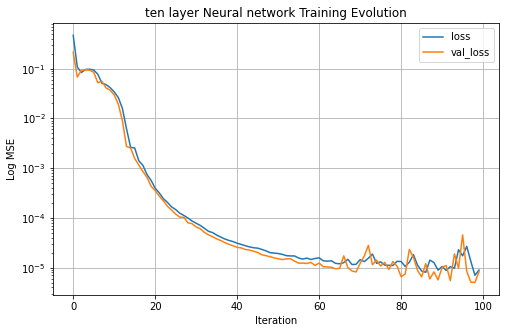

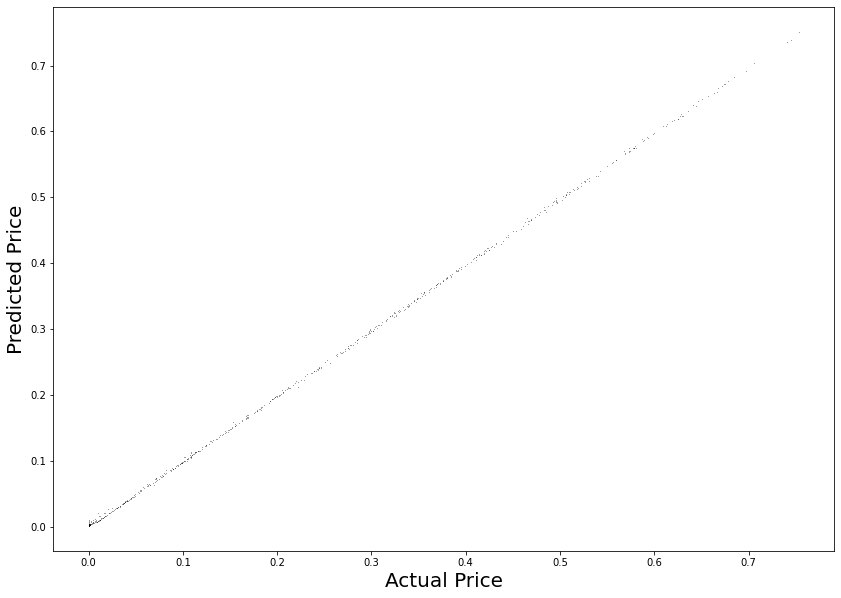

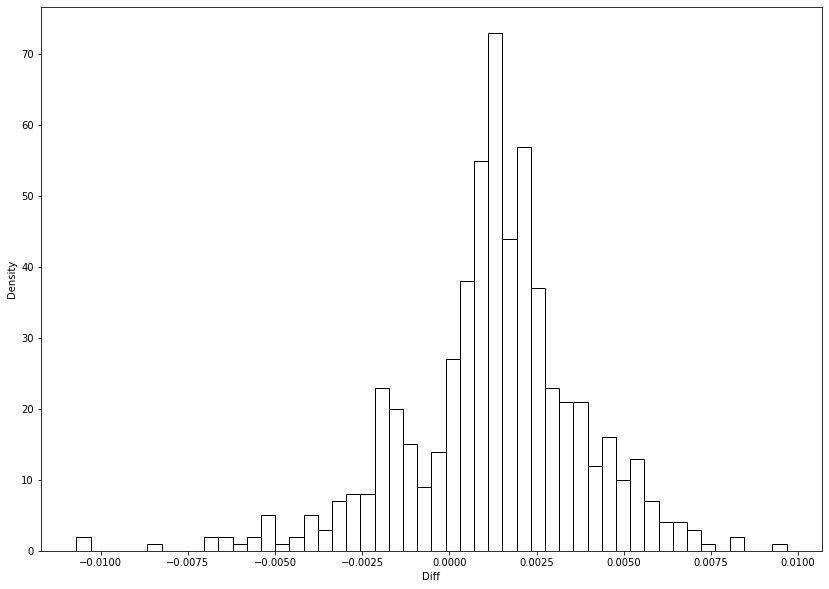

In [ ]:
# for the 10 layer neural network we will continue to use 300 neurons - but 25 neurons in 10 different layers

# number of neurons per layer
nodes2 = 100

# initialize our new model as sequential class
model13 = Sequential()

# add the first layer of 100 neurons - for the first layer you must declare the number of features through input_dim arguments
model13.add(Dense(nodes2, activation='relu', input_dim=X_train.shape[1])) # activation = 'relu', 'tanh', 'sigmoid'

# add another 9 layers of neurons
for i in range(9):
  model13.add(Dense(nodes2, activation='relu'))

# output layer is the same as the single NN
model13.add(Dense(1))

model13.add(Activation(custom_activation))

# compile and fit the model
model13.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'
history13 = model13.fit(X_train, y_train, batch_size=512, epochs=100, validation_split=0.1, verbose=0,
                          validation_data=(X_test, y_test))
#print()
print(model13.summary())

pd.DataFrame(history13.history).plot(figsize=(8,5), logy=True)
plt.title('ten layer Neural network Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

y2_test_hat = model13.predict(X_test)
y2_test_hat = np.squeeze(y2_test_hat)
CheckAccuracy(y_test, y2_test_hat)

Deep neural network with 10 layers


>## Part A.2








We continue with 10 layers, since the result is significantly better than 1 and 3 layers

For A2 we experiment with different kinds of activation functions

>Activation funcion: Sigmoid

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 100)               600       
                                                                 
 dense_18 (Dense)            (None, 100)               10100     
                                                                 
 dense_19 (Dense)            (None, 100)               10100     
                                                                 
 dense_20 (Dense)            (None, 100)               10100     
                                                                 
 dense_21 (Dense)            (None, 100)               10100     
                                                                 
 dense_22 (Dense)            (None, 100)               10100     
                                                                 
 dense_23 (Dense)            (None, 100)              

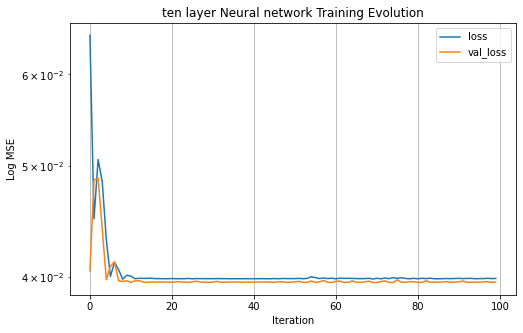

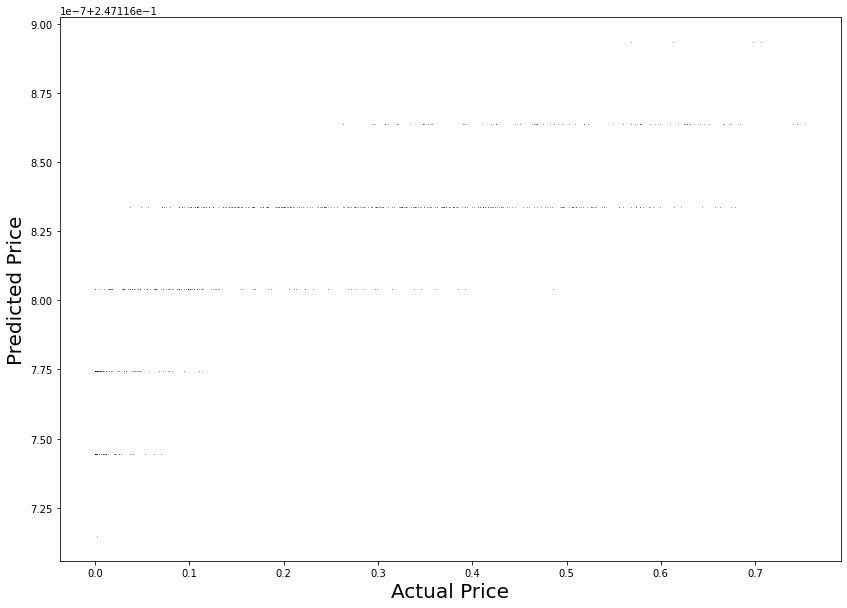

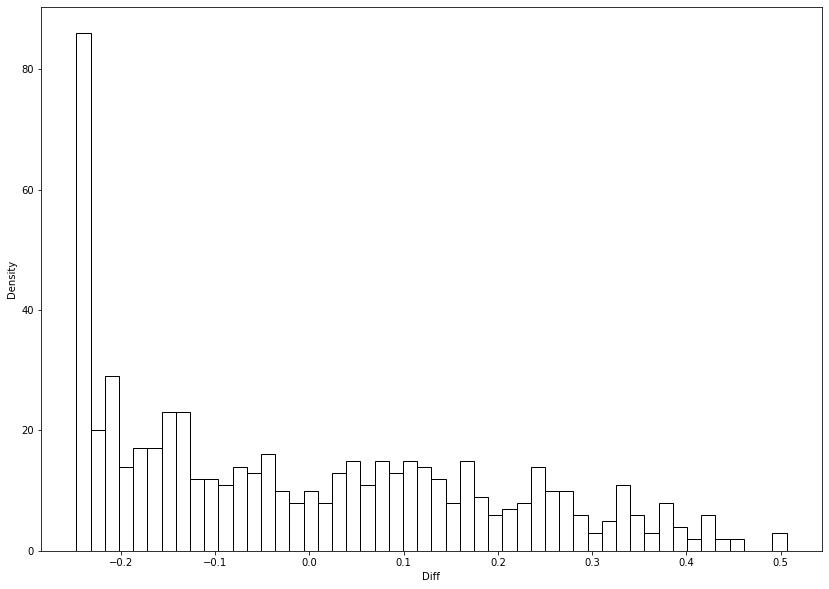

In [ ]:
# Experimentation with the sigmoid activation function
# The experimentation will be made with a deep neural network with 10 layers and 100 nodes in each layer. 
# The loss function will be mean squared error and the optimizer will be adam.
activation_f='sigmoid'
# number of neurons per layer
nodes2 = 100

# initialize our new model as sequential class
model13 = Sequential()

# add the first layer of 100 neurons - for the first layer you must declare the number of features through input_dim arguments
model13.add(Dense(nodes2, activation='sigmoid', input_dim=X_train.shape[1])) # activation = 'relu', 'tanh', 'sigmoid'

# add another 9 layers of neurons
for i in range(9):
  model13.add(Dense(nodes2, activation='sigmoid'))

# output layer is the same as the single NN
model13.add(Dense(1))

model13.add(Activation(custom_activation))

# compile and fit the model
model13.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'
history13 = model13.fit(X_train, y_train, batch_size=512, epochs=100, validation_split=0.1, verbose=0,
                          validation_data=(X_test, y_test))
#print()
print(model13.summary())

pd.DataFrame(history13.history).plot(figsize=(8,5), logy=True)
plt.title('ten layer Neural network Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

y2_test_hat = model13.predict(X_test)
y2_test_hat = np.squeeze(y2_test_hat)
CheckAccuracy(y_test, y2_test_hat)

> Activation function: tanh

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               600       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               1

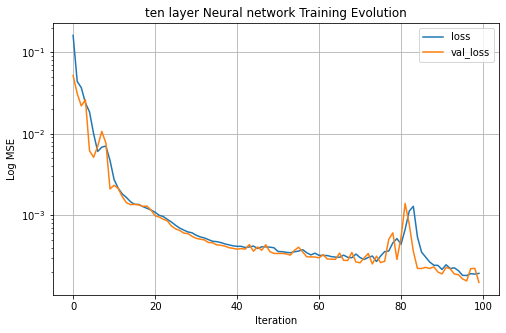

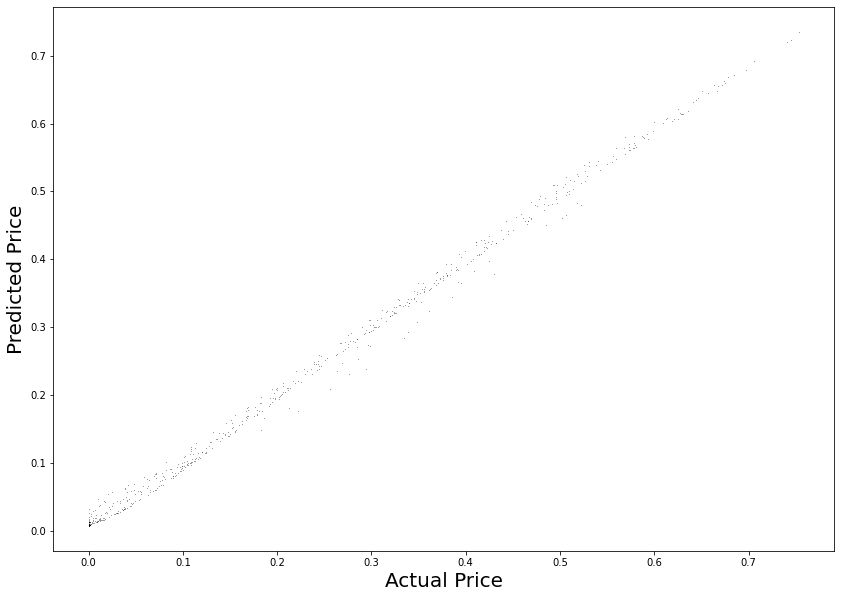

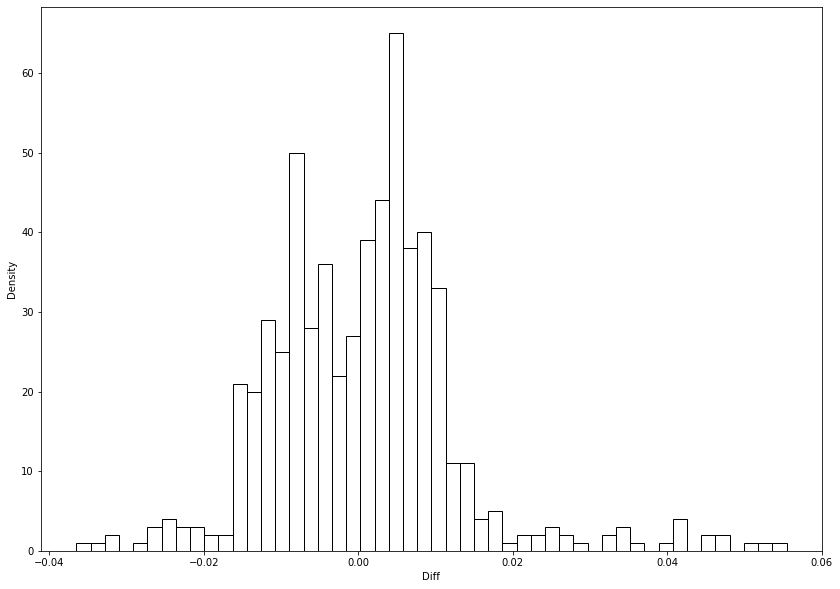

In [ ]:
# Experimentation with the tanh activation function
# The experimentation will be made with a deep neural network with 3 layers and 100 nodes in each layer. 
# The loss function will be mean squared error and the optimizer will be adam.
activation_f='tanh'
# number of neurons per layer
nodes2 = 100

# initialize our new model as sequential class
model13 = Sequential()

# add the first layer of 100 neurons - for the first layer you must declare the number of features through input_dim arguments
model13.add(Dense(nodes2, activation='tanh', input_dim=X_train.shape[1])) # activation = 'relu', 'tanh', 'sigmoid'

# add another 9 layers of neurons
for i in range(9):
  model13.add(Dense(nodes2, activation='tanh'))

# output layer is the same as the single NN
model13.add(Dense(1))

model13.add(Activation(custom_activation))

# compile and fit the model
model13.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'
history13 = model13.fit(X_train, y_train, batch_size=512, epochs=100, validation_split=0.1, verbose=0,
                          validation_data=(X_test, y_test))
#print()
print(model13.summary())

pd.DataFrame(history13.history).plot(figsize=(8,5), logy=True)
plt.title('ten layer Neural network Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

y2_test_hat = model13.predict(X_test)
y2_test_hat = np.squeeze(y2_test_hat)
CheckAccuracy(y_test, y2_test_hat)

> Activation function: relu

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 100)               600       
                                                                 
 dense_40 (Dense)            (None, 100)               10100     
                                                                 
 dense_41 (Dense)            (None, 100)               10100     
                                                                 
 dense_42 (Dense)            (None, 100)               10100     
                                                                 
 dense_43 (Dense)            (None, 100)               10100     
                                                                 
 dense_44 (Dense)            (None, 100)               10100     
                                                                 
 dense_45 (Dense)            (None, 100)              

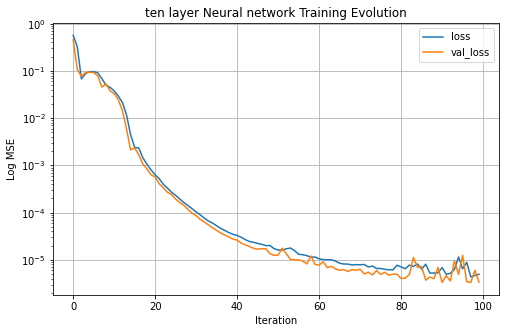

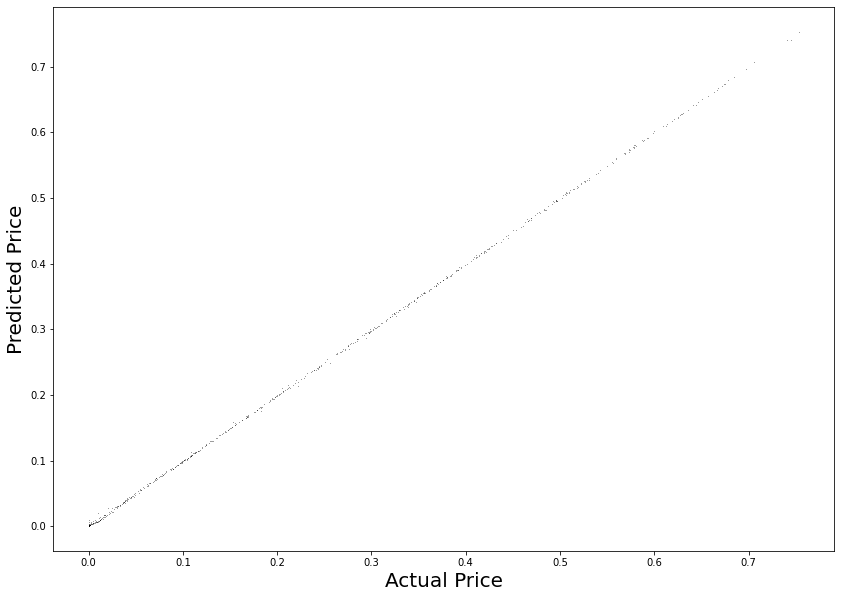

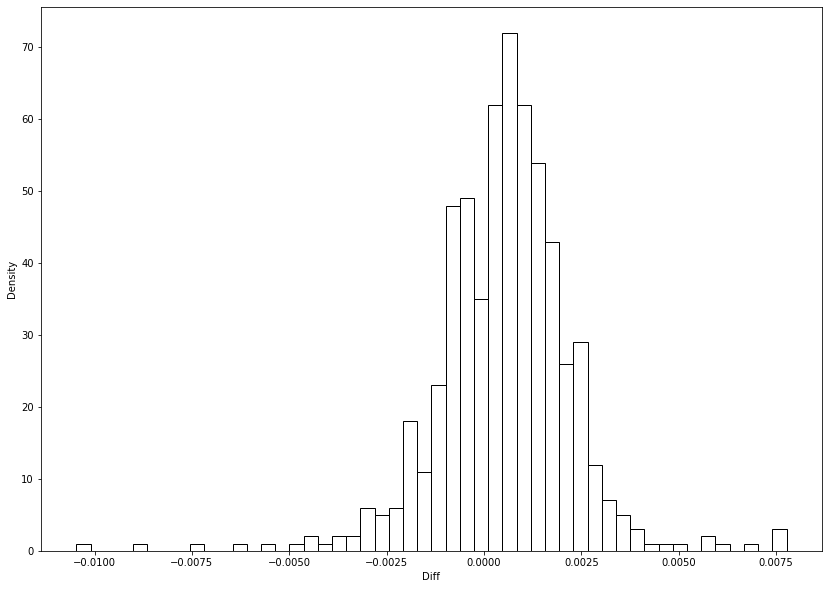

In [ ]:
# Experimentation with the relu activation function
# The experimentation will be made with a deep neural network with 3 layers and 100 nodes in each layer. 
# The loss function will be mean squared error and the optimizer will be adam.
activation_f='relu'
# number of neurons per layer
nodes2 = 100

# initialize our new model as sequential class
model13 = Sequential()

# add the first layer of 100 neurons - for the first layer you must declare the number of features through input_dim arguments
model13.add(Dense(nodes2, activation='relu', input_dim=X_train.shape[1])) # activation = 'relu', 'tanh', 'sigmoid'

# add another 9 layers of neurons
for i in range(9):
  model13.add(Dense(nodes2, activation='relu'))

# output layer is the same as the single NN
model13.add(Dense(1))

model13.add(Activation(custom_activation))

# compile and fit the model
model13.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'
history13 = model13.fit(X_train, y_train, batch_size=512, epochs=100, validation_split=0.1, verbose=0,
                          validation_data=(X_test, y_test))
#print()
print(model13.summary())

pd.DataFrame(history13.history).plot(figsize=(8,5), logy=True)
plt.title('ten layer Neural network Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

y2_test_hat = model13.predict(X_test)
y2_test_hat = np.squeeze(y2_test_hat)
CheckAccuracy(y_test, y2_test_hat)

> ## Part A.3

We carry on with relu becuase the model is best

>3 layers with 10 neurons

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 10)                60        
                                                                 
 dense_51 (Dense)            (None, 10)                110       
                                                                 
 dense_52 (Dense)            (None, 10)                110       
                                                                 
 dense_53 (Dense)            (None, 10)                110       
                                                                 
 dense_54 (Dense)            (None, 10)                110       
                                                                 
 dense_55 (Dense)            (None, 10)                110       
                                                                 
 dense_56 (Dense)            (None, 10)               

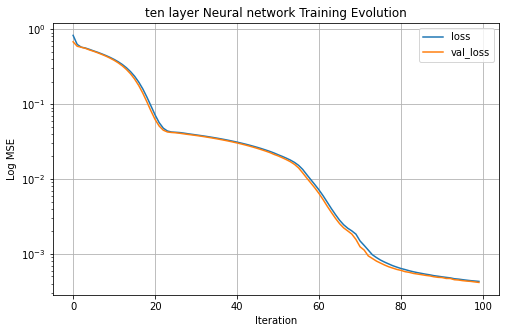

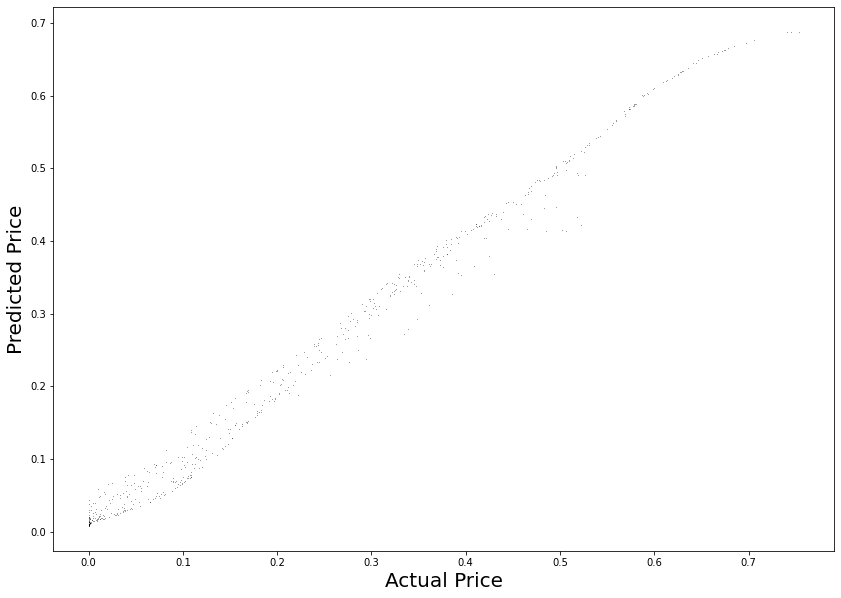

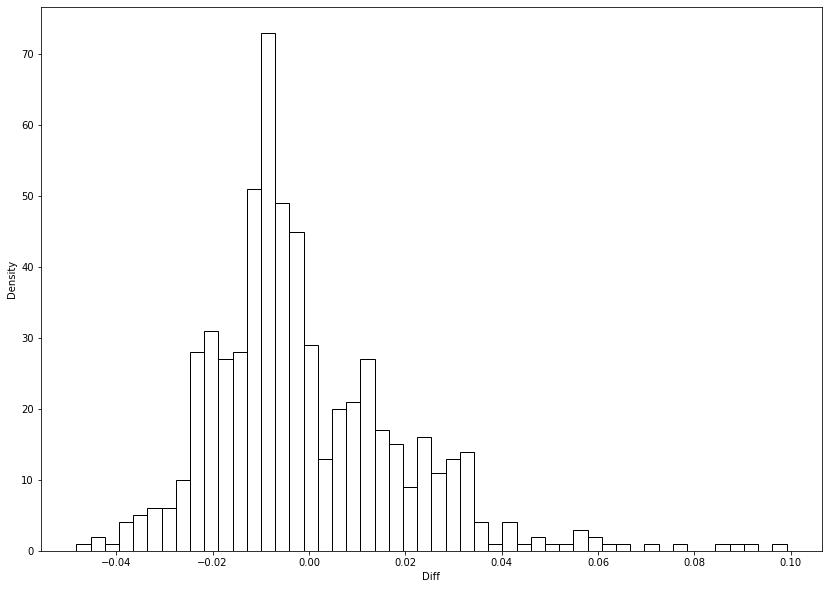

In [ ]:
# A deep neural network with 10 layers and 10 nodes in each layer will be used. 
# The loss function will be mean squared error and the optimizer will be adam and activation function relu.
activation_f='sigmoid'
# number of neurons per layer
nodes2 = 10

# initialize our new model as sequential class
model13 = Sequential()

# add the first layer of 100 neurons - for the first layer you must declare the number of features through input_dim arguments
model13.add(Dense(nodes2, activation='relu', input_dim=X_train.shape[1])) # activation = 'relu', 'tanh', 'sigmoid'

# add another 9 layers of neurons
for i in range(9):
  model13.add(Dense(nodes2, activation='relu'))

# output layer is the same as the single NN
model13.add(Dense(1))

model13.add(Activation(custom_activation))

# compile and fit the model
model13.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'
history13 = model13.fit(X_train, y_train, batch_size=512, epochs=100, validation_split=0.1, verbose=0,
                          validation_data=(X_test, y_test))
#print()
print(model13.summary())

pd.DataFrame(history13.history).plot(figsize=(8,5), logy=True)
plt.title('ten layer Neural network Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

y2_test_hat = model13.predict(X_test)
y2_test_hat = np.squeeze(y2_test_hat)
CheckAccuracy(y_test, y2_test_hat)

>3 layers with 50 Neurons

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 50)                300       
                                                                 
 dense_62 (Dense)            (None, 50)                2550      
                                                                 
 dense_63 (Dense)            (None, 50)                2550      
                                                                 
 dense_64 (Dense)            (None, 50)                2550      
                                                                 
 dense_65 (Dense)            (None, 50)                2550      
                                                                 
 dense_66 (Dense)            (None, 50)                2550      
                                                                 
 dense_67 (Dense)            (None, 50)               

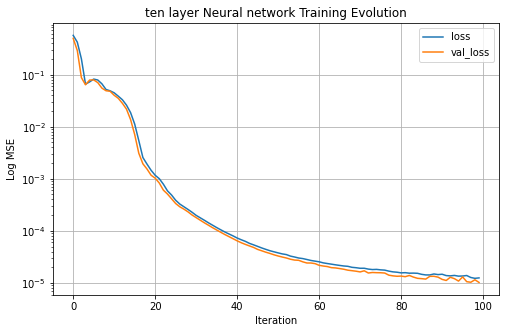

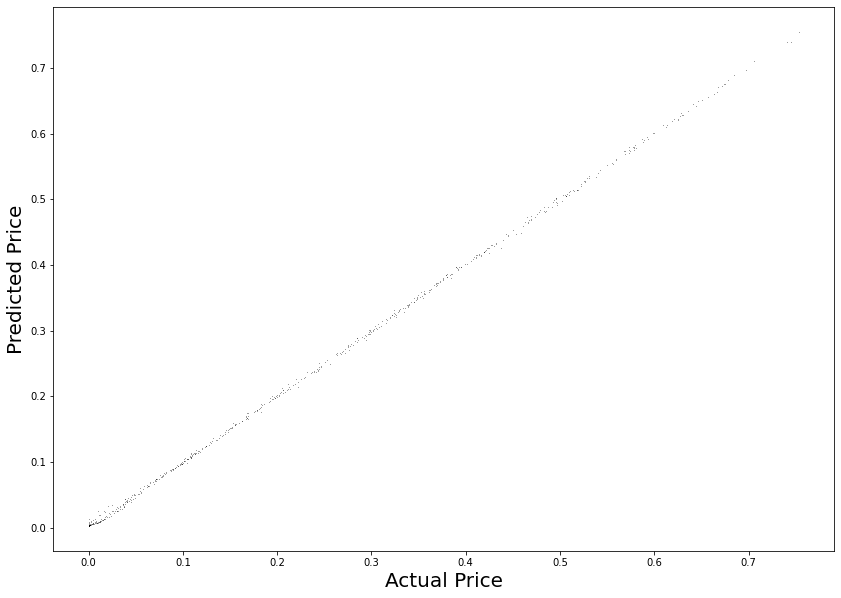

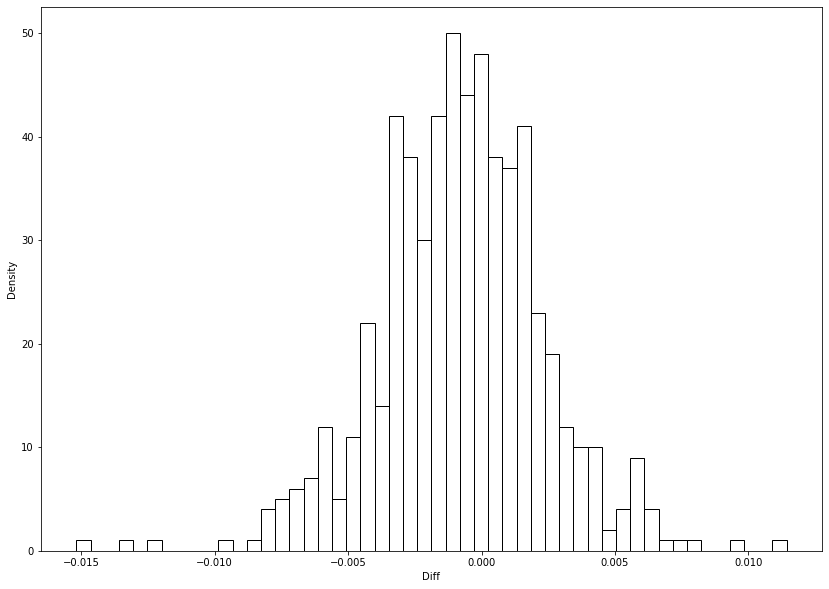

In [ ]:
# A deep neural network with 3 layers and 50 nodes in each layer will be used. 
# The loss function will be mean squared error and the optimizer will be adam and activation function relu.
activation_f='sigmoid'
# number of neurons per layer
nodes2 = 50

# initialize our new model as sequential class
model13 = Sequential()

# add the first layer of 100 neurons - for the first layer you must declare the number of features through input_dim arguments
model13.add(Dense(nodes2, activation='relu', input_dim=X_train.shape[1])) # activation = 'relu', 'tanh', 'sigmoid'

# add another 9 layers of neurons
for i in range(9):
  model13.add(Dense(nodes2, activation='relu'))

# output layer is the same as the single NN
model13.add(Dense(1))

model13.add(Activation(custom_activation))

# compile and fit the model
model13.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'
history13 = model13.fit(X_train, y_train, batch_size=512, epochs=100, validation_split=0.1, verbose=0,
                          validation_data=(X_test, y_test))
#print()
print(model13.summary())

pd.DataFrame(history13.history).plot(figsize=(8,5), logy=True)
plt.title('ten layer Neural network Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

y2_test_hat = model13.predict(X_test)
y2_test_hat = np.squeeze(y2_test_hat)
CheckAccuracy(y_test, y2_test_hat)

> 3 layers with 100 neurons

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 100)               600       
                                                                 
 dense_73 (Dense)            (None, 100)               10100     
                                                                 
 dense_74 (Dense)            (None, 100)               10100     
                                                                 
 dense_75 (Dense)            (None, 100)               10100     
                                                                 
 dense_76 (Dense)            (None, 100)               10100     
                                                                 
 dense_77 (Dense)            (None, 100)               10100     
                                                                 
 dense_78 (Dense)            (None, 100)              

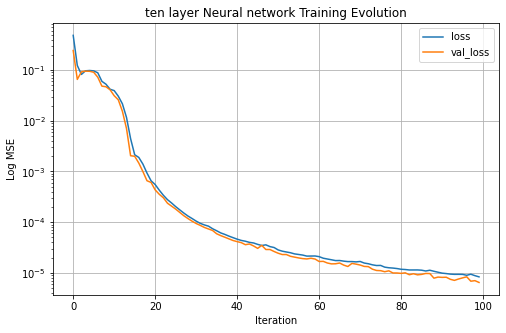

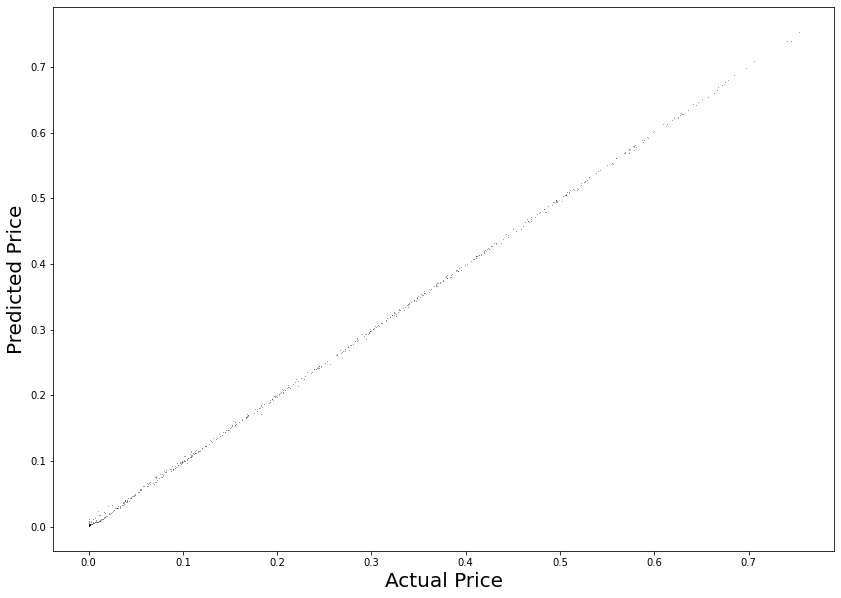

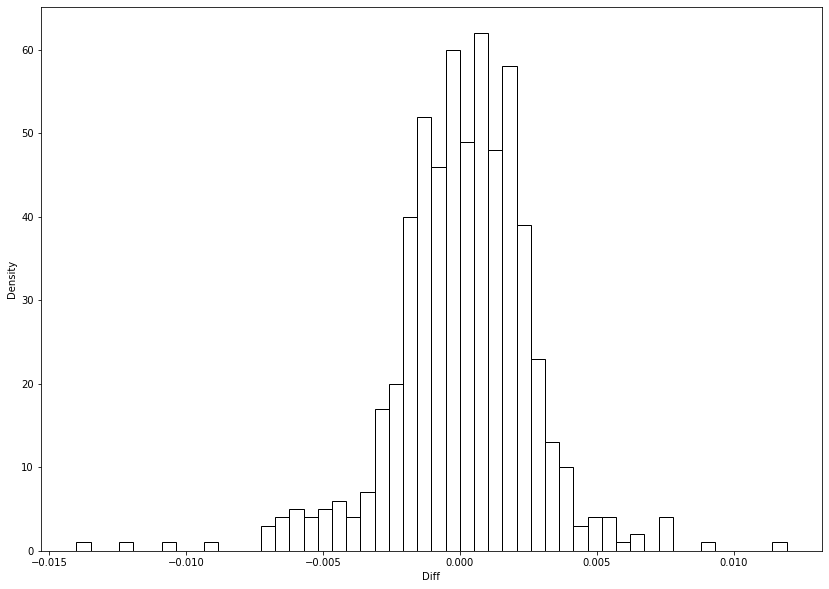

In [ ]:
# A deep neural network with 3 layers and 100 nodes in each layer will be used. 
# The loss function will be mean squared error and the optimizer will be adam and activation function relu.
activation_f='sigmoid'
# number of neurons per layer
nodes2 = 100

# initialize our new model as sequential class
model13 = Sequential()

# add the first layer of 100 neurons - for the first layer you must declare the number of features through input_dim arguments
model13.add(Dense(nodes2, activation='relu', input_dim=X_train.shape[1])) # activation = 'relu', 'tanh', 'sigmoid'

# add another 9 layers of neurons
for i in range(9):
  model13.add(Dense(nodes2, activation='relu'))

# output layer is the same as the single NN
model13.add(Dense(1))

model13.add(Activation(custom_activation))

# compile and fit the model
model13.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'
history13 = model13.fit(X_train, y_train, batch_size=512, epochs=100, validation_split=0.1, verbose=0,
                          validation_data=(X_test, y_test))
#print()
print(model13.summary())

pd.DataFrame(history13.history).plot(figsize=(8,5), logy=True)
plt.title('ten layer Neural network Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

y2_test_hat = model13.predict(X_test)
y2_test_hat = np.squeeze(y2_test_hat)
CheckAccuracy(y_test, y2_test_hat)

> ## Part A.4

We carry on with 100 neurons in each layer becuase the result is best.


The 3 optimizers Adam, rmsprop and momentum is used:

Adam:

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_83 (Dense)            (None, 100)               600       
                                                                 
 dense_84 (Dense)            (None, 100)               10100     
                                                                 
 dense_85 (Dense)            (None, 100)               10100     
                                                                 
 dense_86 (Dense)            (None, 100)               10100     
                                                                 
 dense_87 (Dense)            (None, 100)               10100     
                                                                 
 dense_88 (Dense)            (None, 100)               10100     
                                                                 
 dense_89 (Dense)            (None, 100)              

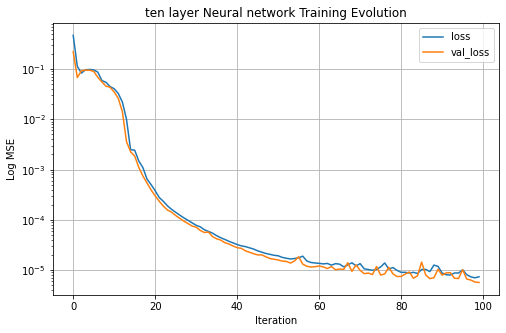

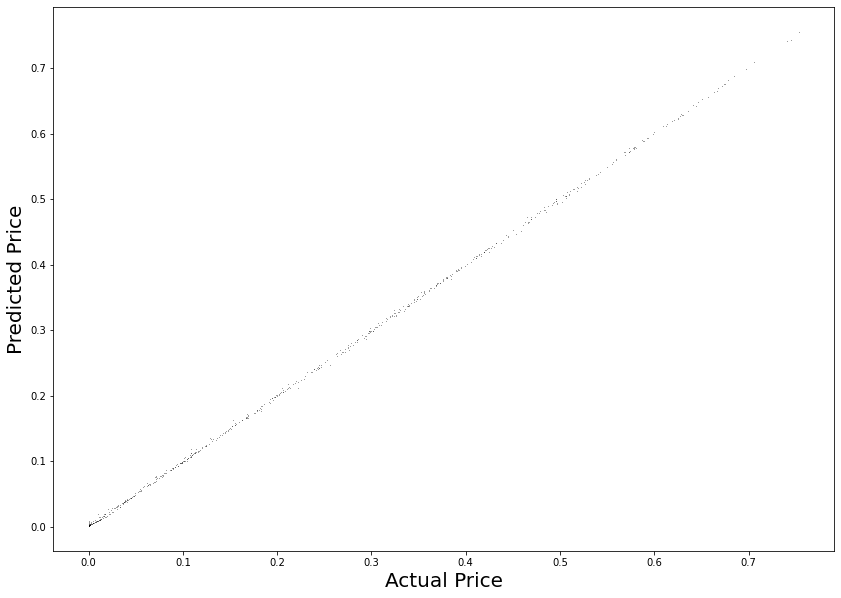

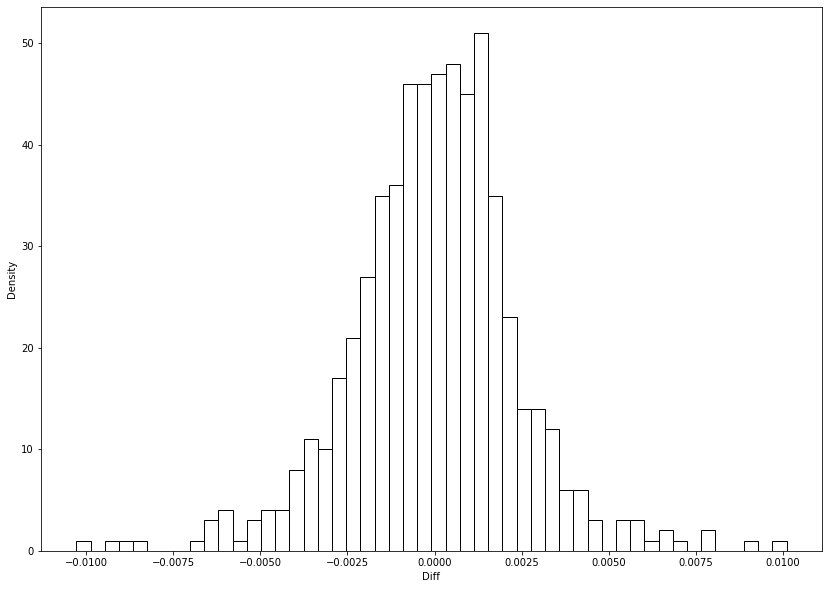

In [ ]:
# A deep neural network with 10 layers and 100 nodes in each layer will be used. 
# The loss function will be mean squared error and the optimizer will be adam and activation function sigmoid.
activation_f='sigmoid'
# number of neurons per layer
nodes2 = 100

# initialize our new model as sequential class
model13 = Sequential()

# add the first layer of 100 neurons - for the first layer you must declare the number of features through input_dim arguments
model13.add(Dense(nodes2, activation='relu', input_dim=X_train.shape[1])) # activation = 'relu', 'tanh', 'sigmoid'

# add another 9 layers of neurons
for i in range(9):
  model13.add(Dense(nodes2, activation='relu'))

# output layer is the same as the single NN
model13.add(Dense(1))

model13.add(Activation(custom_activation))

# compile and fit the model
model13.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'
history13 = model13.fit(X_train, y_train, batch_size=512, epochs=100, validation_split=0.1, verbose=0,
                          validation_data=(X_test, y_test))
#print()
print(model13.summary())

pd.DataFrame(history13.history).plot(figsize=(8,5), logy=True)
plt.title('ten layer Neural network Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

y2_test_hat = model13.predict(X_test)
y2_test_hat = np.squeeze(y2_test_hat)
CheckAccuracy(y_test, y2_test_hat)

Optimizer: RMSprop

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_94 (Dense)            (None, 100)               600       
                                                                 
 dense_95 (Dense)            (None, 100)               10100     
                                                                 
 dense_96 (Dense)            (None, 100)               10100     
                                                                 
 dense_97 (Dense)            (None, 100)               10100     
                                                                 
 dense_98 (Dense)            (None, 100)               10100     
                                                                 
 dense_99 (Dense)            (None, 100)               10100     
                                                                 
 dense_100 (Dense)           (None, 100)             

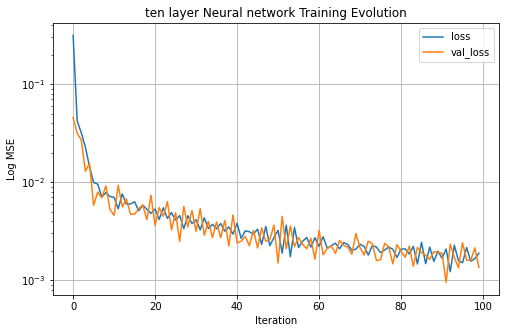

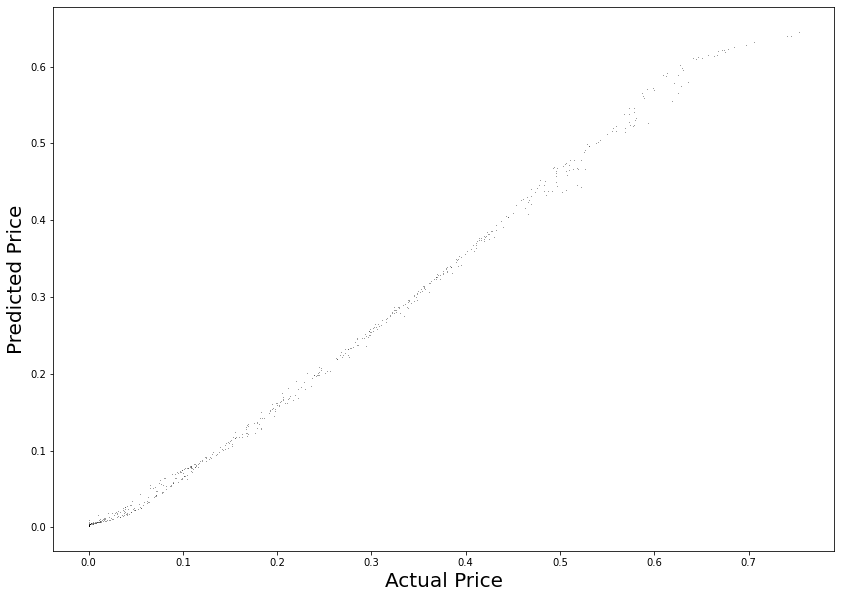

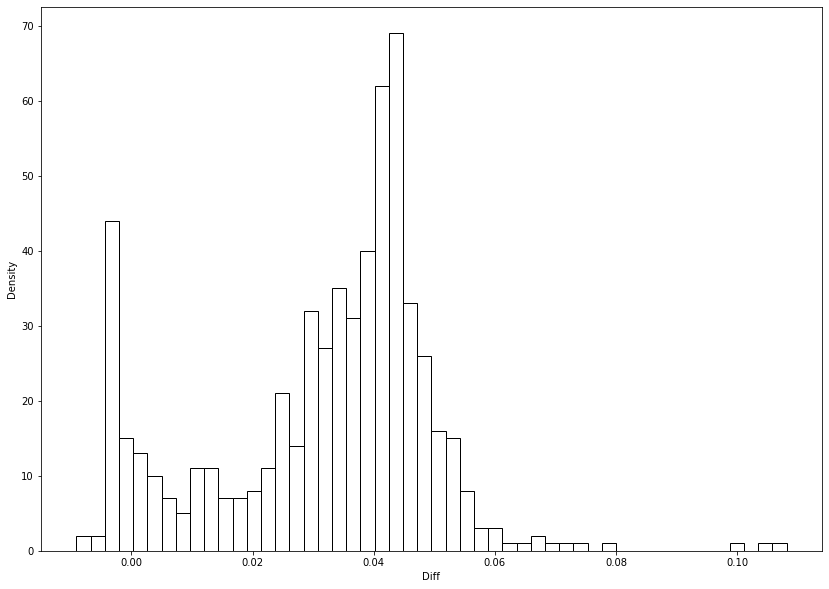

In [ ]:
# A deep neural network with 10 layers and 100 nodes in each layer will be used. 
# The loss function will be mean squared error and the optimizer will be adam and activation function sigmoid.
activation_f='sigmoid'
# number of neurons per layer
nodes2 = 100

# initialize our new model as sequential class
model13 = Sequential()

# add the first layer of 100 neurons - for the first layer you must declare the number of features through input_dim arguments
model13.add(Dense(nodes2, activation='relu', input_dim=X_train.shape[1])) # activation = 'relu', 'tanh', 'sigmoid'

# add another 9 layers of neurons
for i in range(9):
  model13.add(Dense(nodes2, activation='relu'))

# output layer is the same as the single NN
model13.add(Dense(1))

model13.add(Activation(custom_activation))

# compile and fit the model
model13.compile(loss='mse', optimizer='rmsprop') # optimizer = 'rmsprop', 'sgd', 'adam'
history13 = model13.fit(X_train, y_train, batch_size=512, epochs=100, validation_split=0.1, verbose=0,
                          validation_data=(X_test, y_test))
#print()
print(model13.summary())

pd.DataFrame(history13.history).plot(figsize=(8,5), logy=True)
plt.title('ten layer Neural network Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

y2_test_hat = model13.predict(X_test)
y2_test_hat = np.squeeze(y2_test_hat)
CheckAccuracy(y_test, y2_test_hat)

Optimizer: sgd (Stochastic gradient decent with Momentum)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 100)               600       
                                                                 
 dense_106 (Dense)           (None, 100)               10100     
                                                                 
 dense_107 (Dense)           (None, 100)               10100     
                                                                 
 dense_108 (Dense)           (None, 100)               10100     
                                                                 
 dense_109 (Dense)           (None, 100)               10100     
                                                                 
 dense_110 (Dense)           (None, 100)               10100     
                                                                 
 dense_111 (Dense)           (None, 100)             

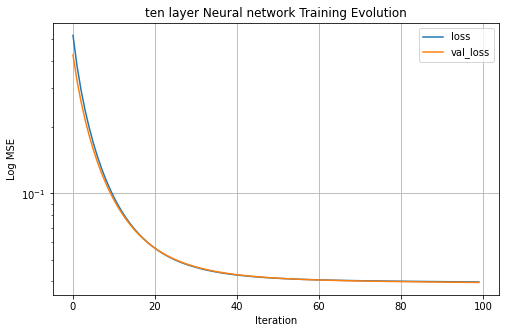

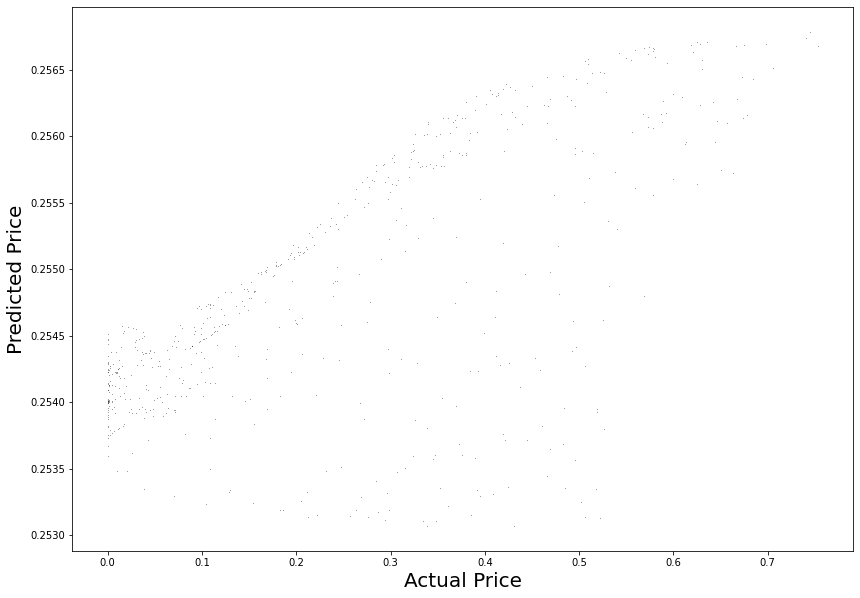

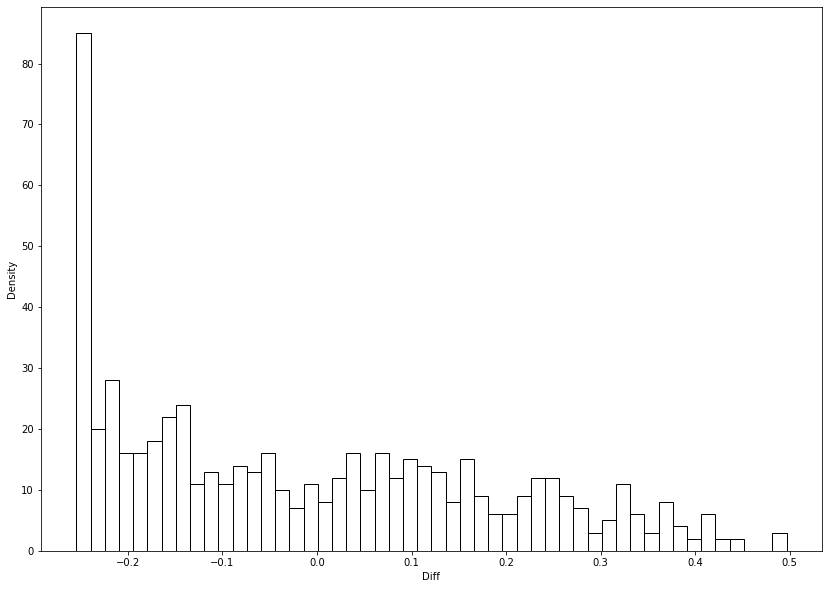

In [ ]:
# A deep neural network with 10 layers and 100 nodes in each layer will be used. 
# The loss function will be mean squared error and the optimizer will be adam and activation function sigmoid.
activation_f='sigmoid'
# number of neurons per layer
nodes2 = 100

# initialize our new model as sequential class
model13 = Sequential()

# add the first layer of 100 neurons - for the first layer you must declare the number of features through input_dim arguments
model13.add(Dense(nodes2, activation='relu', input_dim=X_train.shape[1])) # activation = 'relu', 'tanh', 'sigmoid'

# add another 9 layers of neurons
for i in range(9):
  model13.add(Dense(nodes2, activation='relu'))

# output layer is the same as the single NN
model13.add(Dense(1))

model13.add(Activation(custom_activation))

# compile and fit the model
model13.compile(loss='mse', optimizer='sgd') # optimizer = 'rmsprop', 'sgd', 'adam'
history13 = model13.fit(X_train, y_train, batch_size=512, epochs=100, validation_split=0.1, verbose=0,
                          validation_data=(X_test, y_test))
#print()
print(model13.summary())

pd.DataFrame(history13.history).plot(figsize=(8,5), logy=True)
plt.title('ten layer Neural network Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

y2_test_hat = model13.predict(X_test)
y2_test_hat = np.squeeze(y2_test_hat)
CheckAccuracy(y_test, y2_test_hat)

> ## Part A.5

We continue with optimizer set to Adam, because it provides the lowest mean squared error without fluctuations

With 100 Epochs

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_116 (Dense)           (None, 100)               600       
                                                                 
 dense_117 (Dense)           (None, 100)               10100     
                                                                 
 dense_118 (Dense)           (None, 100)               10100     
                                                                 
 dense_119 (Dense)           (None, 100)               10100     
                                                                 
 dense_120 (Dense)           (None, 100)               10100     
                                                                 
 dense_121 (Dense)           (None, 100)               10100     
                                                                 
 dense_122 (Dense)           (None, 100)             

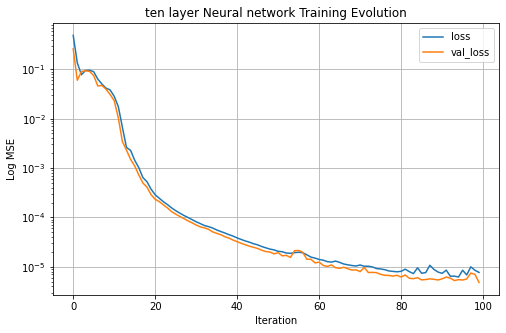

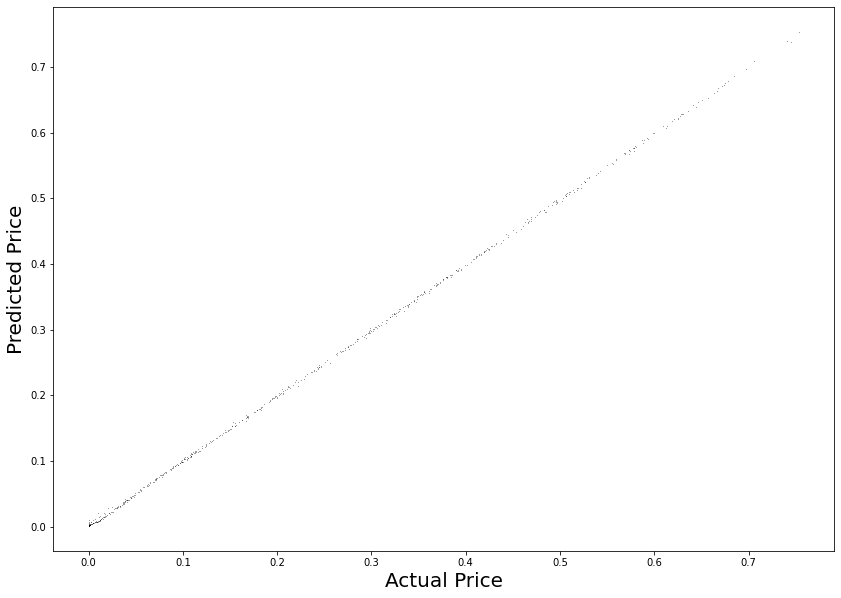

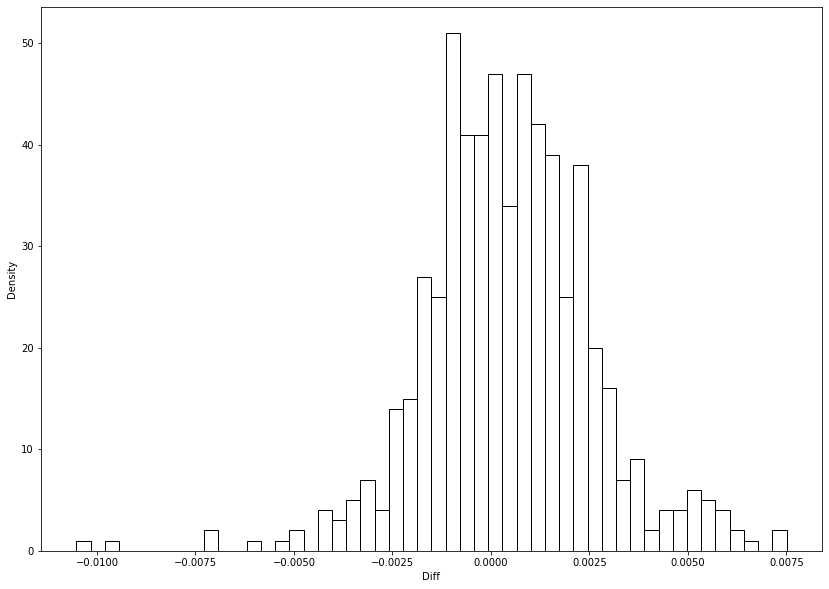

In [ ]:
# A deep neural network with 10 layers and 100 nodes in each layer will be used. 
# The loss function will be mean squared error and the optimizer will be adam and activation function sigmoid.
activation_f='sigmoid'
# number of neurons per layer
nodes2 = 100

# initialize our new model as sequential class
model13 = Sequential()

# add the first layer of 100 neurons - for the first layer you must declare the number of features through input_dim arguments
model13.add(Dense(nodes2, activation='relu', input_dim=X_train.shape[1])) # activation = 'relu', 'tanh', 'sigmoid'

# add another 9 layers of neurons
for i in range(9):
  model13.add(Dense(nodes2, activation='relu'))

# output layer is the same as the single NN
model13.add(Dense(1))

model13.add(Activation(custom_activation))

# compile and fit the model
model13.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'
history13 = model13.fit(X_train, y_train, batch_size=512, epochs=100, validation_split=0.1, verbose=0,
                          validation_data=(X_test, y_test))
#print()
print(model13.summary())

pd.DataFrame(history13.history).plot(figsize=(8,5), logy=True)
plt.title('ten layer Neural network Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

y2_test_hat = model13.predict(X_test)
y2_test_hat = np.squeeze(y2_test_hat)
CheckAccuracy(y_test, y2_test_hat)

With 500 epochs

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_127 (Dense)           (None, 100)               600       
                                                                 
 dense_128 (Dense)           (None, 100)               10100     
                                                                 
 dense_129 (Dense)           (None, 100)               10100     
                                                                 
 dense_130 (Dense)           (None, 100)               10100     
                                                                 
 dense_131 (Dense)           (None, 100)               10100     
                                                                 
 dense_132 (Dense)           (None, 100)               10100     
                                                                 
 dense_133 (Dense)           (None, 100)             

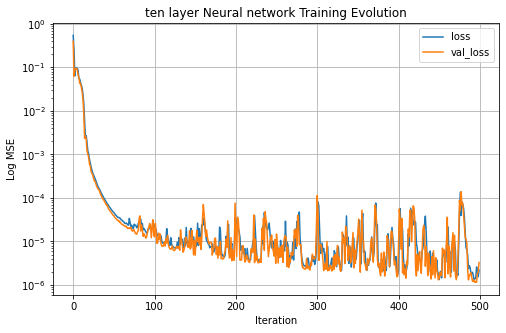

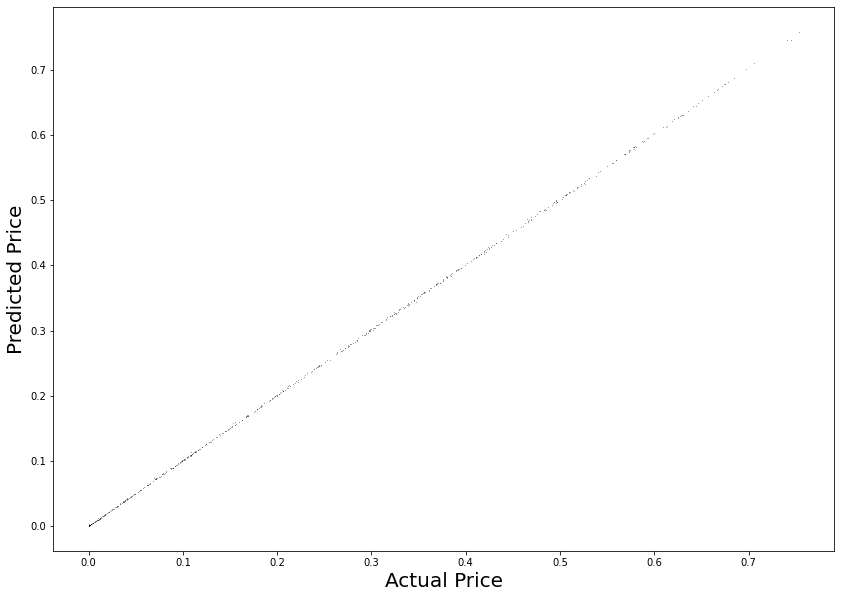

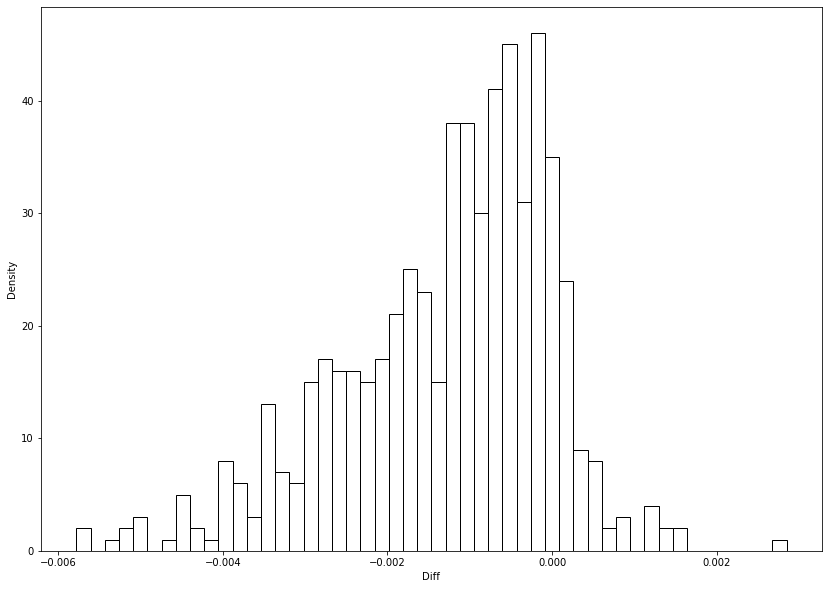

In [ ]:
# A deep neural network with 10 layers and 100 nodes in each layer will be used. 
# The loss function will be mean squared error and the optimizer will be adam and activation function sigmoid.
activation_f='sigmoid'
# number of neurons per layer
nodes2 = 100

# initialize our new model as sequential class
model13 = Sequential()

# add the first layer of 100 neurons - for the first layer you must declare the number of features through input_dim arguments
model13.add(Dense(nodes2, activation='relu', input_dim=X_train.shape[1])) # activation = 'relu', 'tanh', 'sigmoid'

# add another 9 layers of neurons
for i in range(9):
  model13.add(Dense(nodes2, activation='relu'))

# output layer is the same as the single NN
model13.add(Dense(1))

model13.add(Activation(custom_activation))

# compile and fit the model
model13.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'
history13 = model13.fit(X_train, y_train, batch_size=512, epochs=500, validation_split=0.1, verbose=0,
                          validation_data=(X_test, y_test))
#print()
print(model13.summary())

pd.DataFrame(history13.history).plot(figsize=(8,5), logy=True)
plt.title('ten layer Neural network Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

y2_test_hat = model13.predict(X_test)
y2_test_hat = np.squeeze(y2_test_hat)
CheckAccuracy(y_test, y2_test_hat)

With 1,000 epochs

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_138 (Dense)           (None, 100)               600       
                                                                 
 dense_139 (Dense)           (None, 100)               10100     
                                                                 
 dense_140 (Dense)           (None, 100)               10100     
                                                                 
 dense_141 (Dense)           (None, 100)               10100     
                                                                 
 dense_142 (Dense)           (None, 100)               10100     
                                                                 
 dense_143 (Dense)           (None, 100)               10100     
                                                                 
 dense_144 (Dense)           (None, 100)             

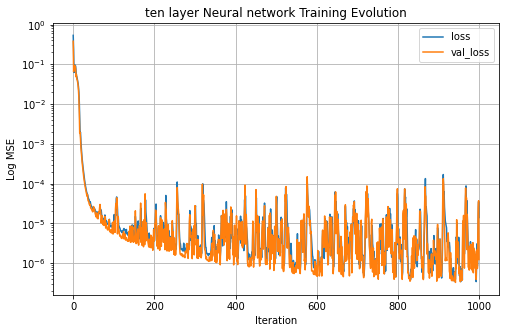

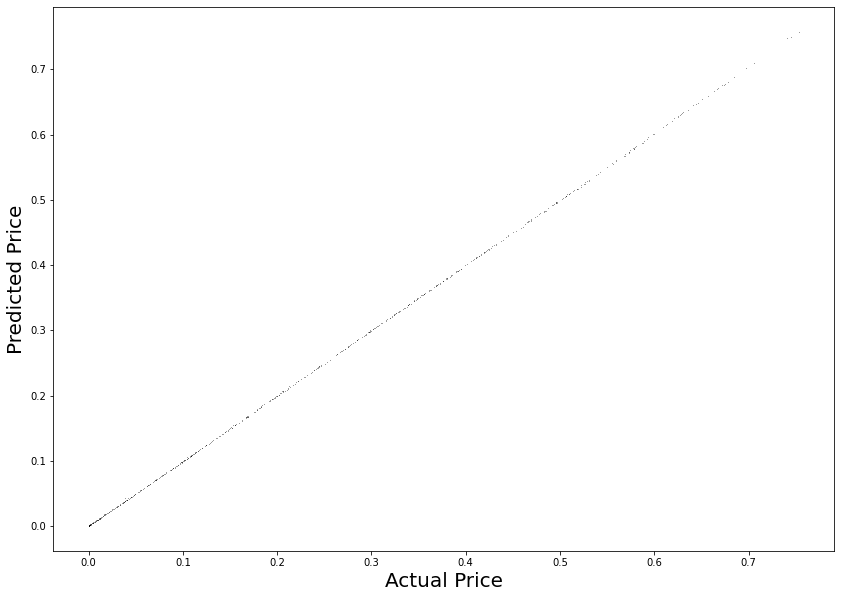

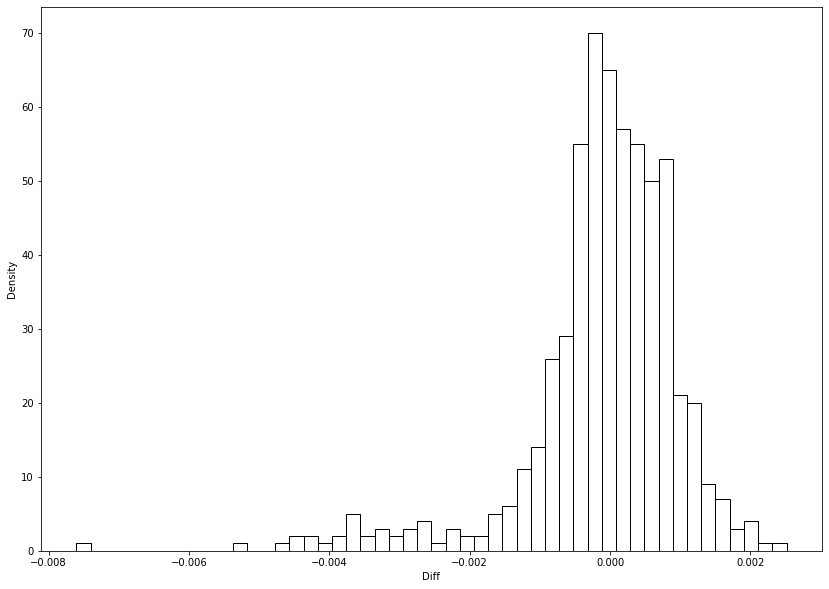

In [ ]:
# A deep neural network with 10 layers and 100 nodes in each layer will be used. 
# The loss function will be mean squared error and the optimizer will be adam and activation function sigmoid.
activation_f='sigmoid'
# number of neurons per layer
nodes2 = 100

# initialize our new model as sequential class
model13 = Sequential()

# add the first layer of 100 neurons - for the first layer you must declare the number of features through input_dim arguments
model13.add(Dense(nodes2, activation='relu', input_dim=X_train.shape[1])) # activation = 'relu', 'tanh', 'sigmoid'

# add another 9 layers of neurons
for i in range(9):
  model13.add(Dense(nodes2, activation='relu'))

# output layer is the same as the single NN
model13.add(Dense(1))

model13.add(Activation(custom_activation))

# compile and fit the model
model13.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'
history13 = model13.fit(X_train, y_train, batch_size=512, epochs=1000, validation_split=0.1, verbose=0,
                          validation_data=(X_test, y_test))
#print()
print(model13.summary())

pd.DataFrame(history13.history).plot(figsize=(8,5), logy=True)
plt.title('ten layer Neural network Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

y2_test_hat = model13.predict(X_test)
y2_test_hat = np.squeeze(y2_test_hat)
CheckAccuracy(y_test, y2_test_hat)

To use 100 or 200 iterations will be sufficient

# Part B

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_149 (Dense)           (None, 100)               600       
                                                                 
 dense_150 (Dense)           (None, 100)               10100     
                                                                 
 dense_151 (Dense)           (None, 100)               10100     
                                                                 
 dense_152 (Dense)           (None, 100)               10100     
                                                                 
 dense_153 (Dense)           (None, 100)               10100     
                                                                 
 dense_154 (Dense)           (None, 100)               10100     
                                                                 
 dense_155 (Dense)           (None, 100)             

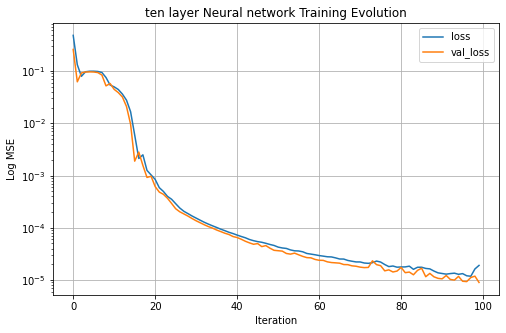

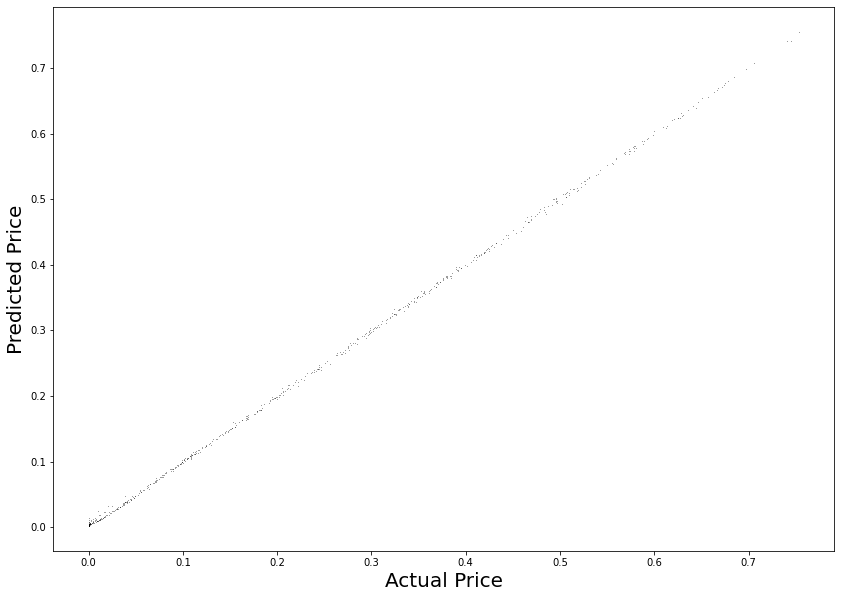

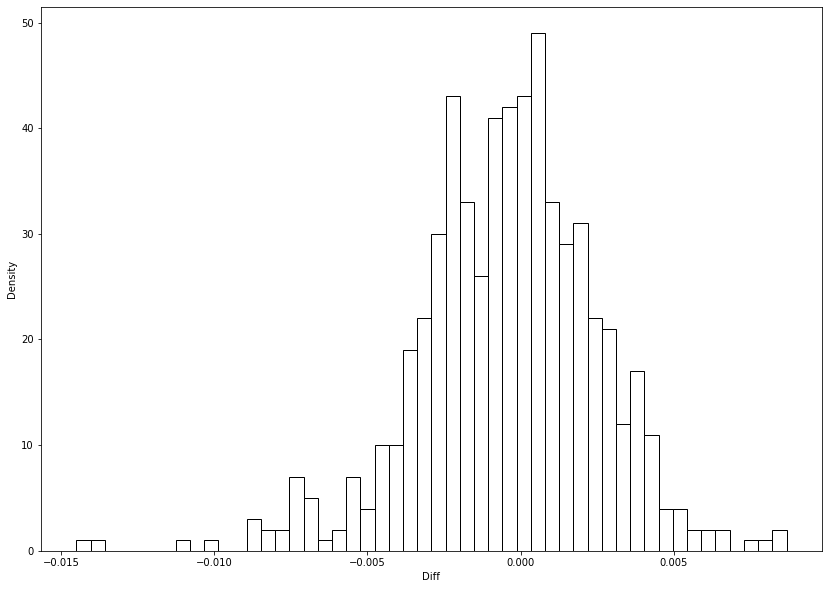

In [ ]:
# BEST MODEL
# A deep neural network with 10 layers and 100 nodes in each layer will be used. 
# The loss function will be mean squared error and the optimizer will be adam and activation function relu.

# number of neurons per layer
nodes2 = 100

# initialize our new model as sequential class
model13 = Sequential()

# add the first layer of 100 neurons - for the first layer you must declare the number of features through input_dim arguments
model13.add(Dense(nodes2, activation='relu', input_dim=X_train.shape[1])) # activation = 'relu', 'tanh', 'sigmoid'

# add another 9 layers of neurons
for i in range(9):
  model13.add(Dense(nodes2, activation='relu'))

# output layer is the same as the single NN
model13.add(Dense(1))

model13.add(Activation(custom_activation))

# compile and fit the model
model13.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'
history13 = model13.fit(X_train, y_train, batch_size=512, epochs=100, validation_split=0.1, verbose=0,
                          validation_data=(X_test, y_test))
#print()
print(model13.summary())

pd.DataFrame(history13.history).plot(figsize=(8,5), logy=True)
plt.title('ten layer Neural network Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

y2_test_hat = model13.predict(X_test)
y2_test_hat = np.squeeze(y2_test_hat)
CheckAccuracy(y_test, y2_test_hat)

#Part C

In [ ]:
#randomizing the entire sample dataset

df_rand = df.sample(frac = 1, random_state = 123).reset_index(drop = True)

In [ ]:
# split data into training validation and testing sets 

# 80% training, 10% validation, 10% testing set 

n = 3000
n_train =  (int)(0.8 * n)
n_val_test = 300

# select training set and define independent and dependent variable (call price)
train_r = df_rand[0:n_train]
X_train_r = train_r[['Stock Price', 'Maturity', 'Dividends', 'Volatility', 'Risk-free']].values
y_train_r = train_r['Call Price'].values

# select validation set and define independent and dependent variable (call price)
val_r = df_rand[n_train :n_train + n_val_test]
X_val_r = val_r[['Stock Price', 'Maturity', 'Dividends', 'Volatility', 'Risk-free']].values
y_val_r = val_r['Call Price'].values

# select testing set and define independent and dependent variable (call price)
test_r = df_rand[n_train + n_val_test: ]
X_test_r = test_r[['Stock Price', 'Maturity', 'Dividends', 'Volatility', 'Risk-free']].values
y_test_r = test_r['Call Price'].values

#Checking if right lengths 
# print(len(train_r))
# print(len(val_r))
# print(len(test_r))

# print(train_r)
# print(val_r)
# print(test_r)




Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_160 (Dense)           (None, 100)               600       
                                                                 
 dense_161 (Dense)           (None, 100)               10100     
                                                                 
 dense_162 (Dense)           (None, 100)               10100     
                                                                 
 dense_163 (Dense)           (None, 100)               10100     
                                                                 
 dense_164 (Dense)           (None, 100)               10100     
                                                                 
 dense_165 (Dense)           (None, 100)               10100     
                                                                 
 dense_166 (Dense)           (None, 100)            

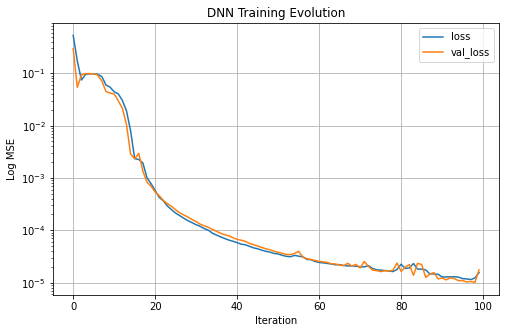

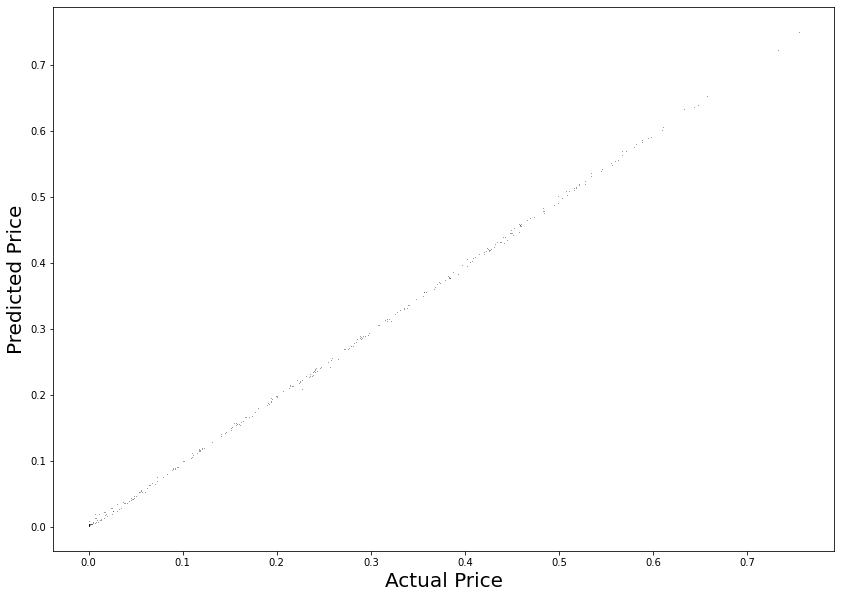

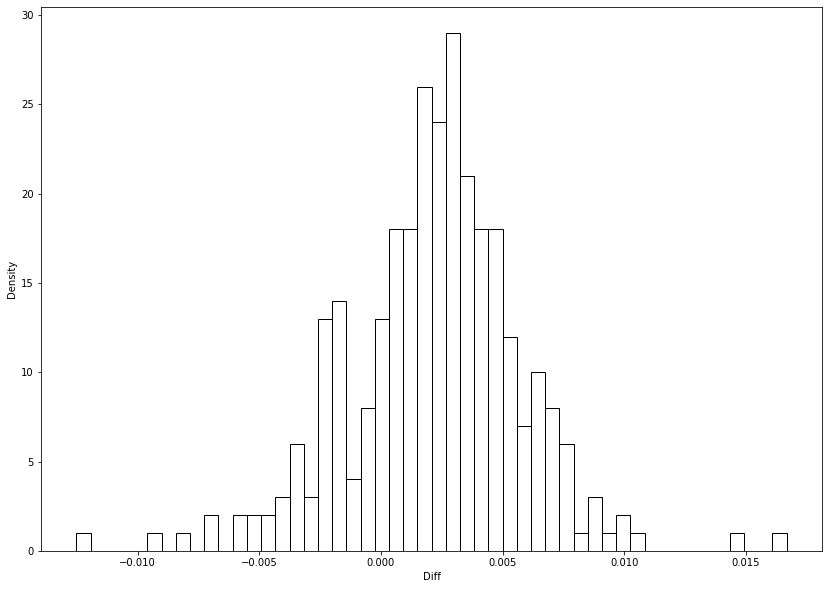

In [ ]:
# RUNNING MODEL with Validation Set

# A deep neural network with 10 layers and 100 nodes in each layer will be used. 
# The loss function will be mean squared error and the optimizer will be adam and activation function relu.
activation_f='sigmoid'
# number of neurons per layer
nodes2 = 100

# initialize our new model as sequential class
model13 = Sequential()

# add the first layer of 100 neurons - for the first layer you must declare the number of features through input_dim arguments
model13.add(Dense(nodes2, activation='relu', input_dim=X_train.shape[1])) # activation = 'relu', 'tanh', 'sigmoid'


# Adds remaining layers
for i in range(9):
  model13.add(Dense(nodes2, activation='relu'))

# Final layer
model13.add(Dense(1))

model13.add(Activation(custom_activation))


# compile and fit the model
model13.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'

history13 = model13.fit(X_train_r, y_train_r, batch_size=512, epochs=100, validation_split=0.1, verbose=0,   
                          validation_data=(X_val_r, y_val_r))# Verbose=0 remove the 100 lines output
print()
print(model13.summary())

#If both validation_data and validation_split are provided, validation_data will override validation_split

pd.DataFrame(history13.history).plot(figsize=(8,5), logy=True)
plt.title('DNN Training Evolution') 
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

#Checking Accuracy with Validation data

y2_val_hat = model13.predict(X_val_r)
y2_val_hat = np.squeeze(y2_val_hat)
CheckAccuracy(y_val_r, y2_val_hat)

10/10 [==============================] - 0s 2ms/step
Mean Squared Error:       1.877871234852983e-05
Root Mean Squared Error:  0.004333441167078403
Mean Absolute Error:      0.0034703077684131965
Mean Percent Error:       0.017689451184775447


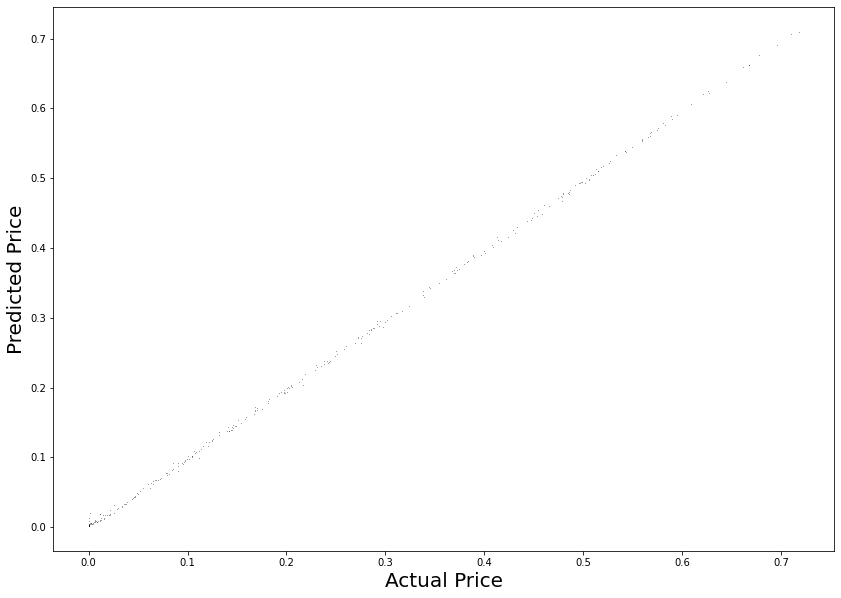

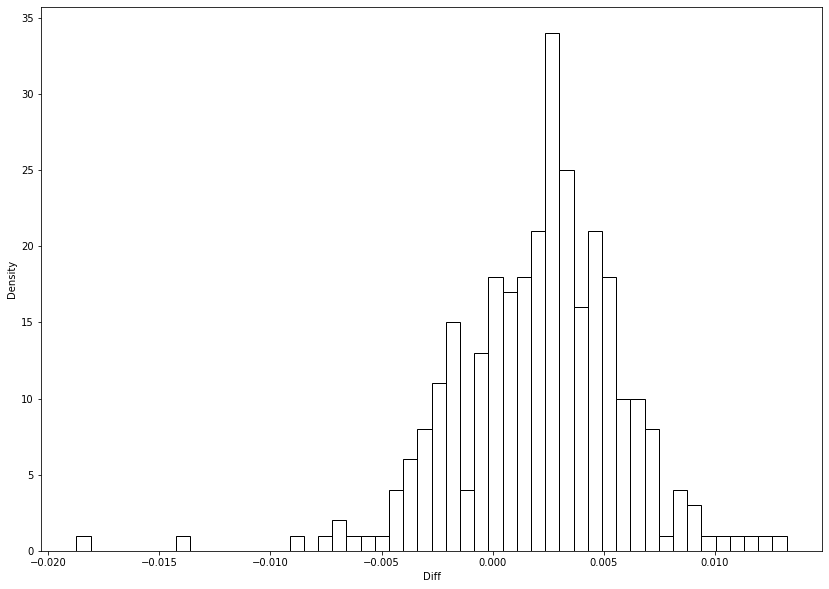

In [ ]:
#Checking Accuracy with Testing data

y2_test_hat = model13.predict(X_test_r)
y2_test_hat = np.squeeze(y2_test_hat)
CheckAccuracy(y_test_r, y2_test_hat)